In [1]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt, cm as cm
from navgridviews.Raster import Raster as NavGridView, get_discrete_cmap

import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
trajectories = [[(1,1,"U"),(1,2,"U"),(1,3,None)], [(1,1,"UR"),(2,2,"UR"),(3,3,None)], [(1,1,"R"),(2,1,"U"),(2,2,None)]]

## $\phi \in \mathcal{R}^{1}$
$\phi:$ Data to be displayed on grid view

### $H \times  W \times C$ input 
(cartesian coordinate system)

[(1, 1, 'U'), (1, 2, 'U'), (1, 3, None)]


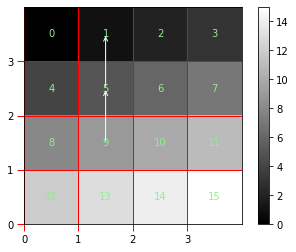

In [3]:
p = NavGridView(np.arange(16).reshape(4,4,1)).render(
    cmap=cm.gray).ticks().grid().show_raster_text(
    fmt="d", color_cb=lambda x: "lightgreen").add_pixel_trajectory(trajectories[0], "blue")
plt.colorbar(p.im)
print(trajectories[0])

## $\phi \in \mathcal{R}^{1}$

### $nStates \times RGB$ input

[(1, 1, 'U'), (1, 2, 'U'), (1, 3, None)]


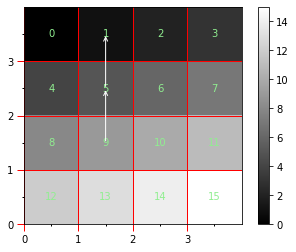

In [4]:
p = NavGridView(np.arange(16).reshape(16,1,1,1)).render(
    cmap=cm.gray).ticks().grid().show_raster_text(
    fmt="d", color_cb=lambda x: "lightgreen").add_pixel_trajectory(trajectories[0], "blue")
plt.colorbar(p.im)
print(trajectories[0])

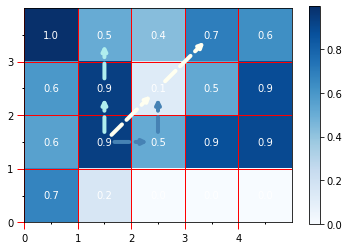

In [5]:
# https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.patches.FancyArrowPatch.html
p = NavGridView(np.random.rand(17,1,1,1)).render(
    cmap=cm.Blues).ticks().grid().add_pixel_trajectories(trajectories, True, 
        {"lw": 4, "linestyle": "--", "shrinkB":10, "shrinkA":10}).show_raster_text(fmt=".1f")
plt.colorbar(p.im)

## $\phi \in \mathcal{R}^{2}$ 

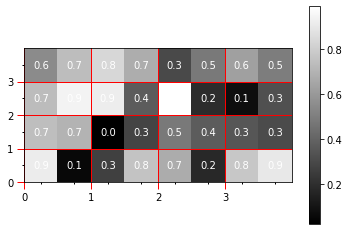

In [6]:
p = NavGridView(np.random.rand(4,4,1,2,1)).render(
    cmap=cm.gray).ticks().grid().show_raster_text(fmt=".1f")
plt.colorbar(p.im)

## $\phi \in \mathcal{R}^{3}$ 

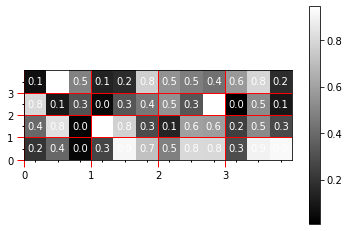

In [7]:
p = NavGridView(np.random.rand(4,4,1,3,1)).render(
    cmap=cm.gray).ticks().grid().show_raster_text(fmt=".1f")
plt.colorbar(p.im)

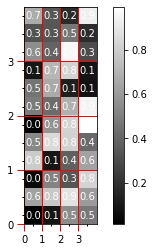

In [8]:
p = NavGridView(np.random.rand(4,4,3,1,1)).render(
    cmap=cm.gray).ticks().grid().show_raster_text(fmt=".1f")
plt.colorbar(p.im)

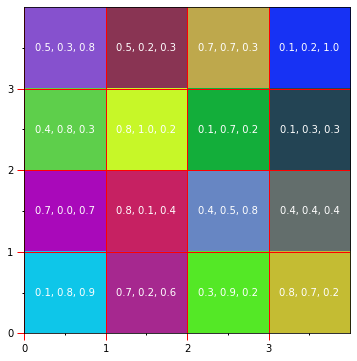

In [9]:
fig = plt.figure(figsize=(6,6))
NavGridView(np.random.rand(4,4,1,1,3), ax=plt.gca()).render().ticks().grid().show_raster_text(fmt=".1f")

## $\phi \in \mathcal{R}^{2} \times \mathcal{R}^{2}$ 

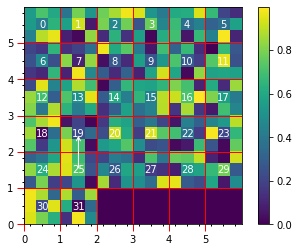

In [10]:
np.random.seed(0)
p = NavGridView(np.random.rand(32,3,3,1)).render().ticks().grid().show_cell_text(
    np.arange(32), fmt=".1f").add_trajectory([(1,1,1), (1,2,1)])
plt.colorbar(p.im)

## $\phi \in \mathcal{R}^{16} \times \mathcal{R}^{16}$ 

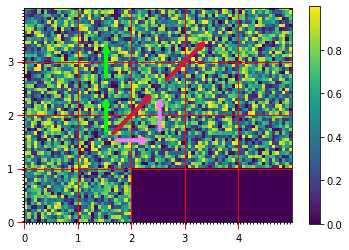

In [11]:
p = NavGridView(np.random.rand(17,16,16,1)).render().ticks().grid().add_trajectories(
    trajectories, True, {"lw": 4, "linestyle": "-", "shrinkB":10, "shrinkA":10})
plt.colorbar(p.im)

## $\phi \in \mathcal{R}^{2} \times \mathcal{R}^{2} \times \mathcal{R}^{3}$ 

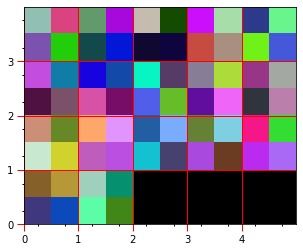

In [12]:
NavGridView(np.random.rand(17,2,2,3)).render().ticks().grid()

## $\phi \in \mathcal{R}^{16} \times \mathcal{R}^{16} \times \mathcal{R}^{3}$ 

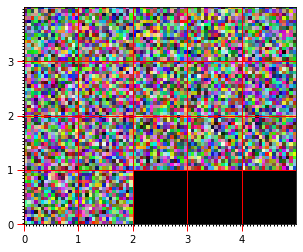

In [13]:
NavGridView(np.random.rand(17,16,16,3)).render().ticks().grid()

## $\phi \in \mathcal{R}^{64} \times \mathcal{R}^{64} \times \mathcal{R}^{3}$ 

CPU times: user 111 ms, sys: 5.82 ms, total: 116 ms
Wall time: 29.1 ms


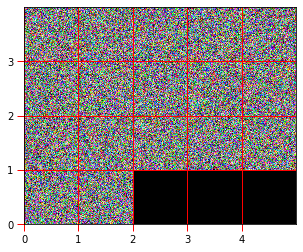

In [14]:
%%time
NavGridView(np.random.rand(17,64,64,3)).render().ticks(minor=False).grid()

## $\phi \in \mathcal{R}^{768} \times \mathcal{R}^{1024} \times \mathcal{R}^{3}$ 

CPU times: user 4.08 s, sys: 631 ms, total: 4.71 s
Wall time: 3.09 s


Text(0.5, 1.0, '')

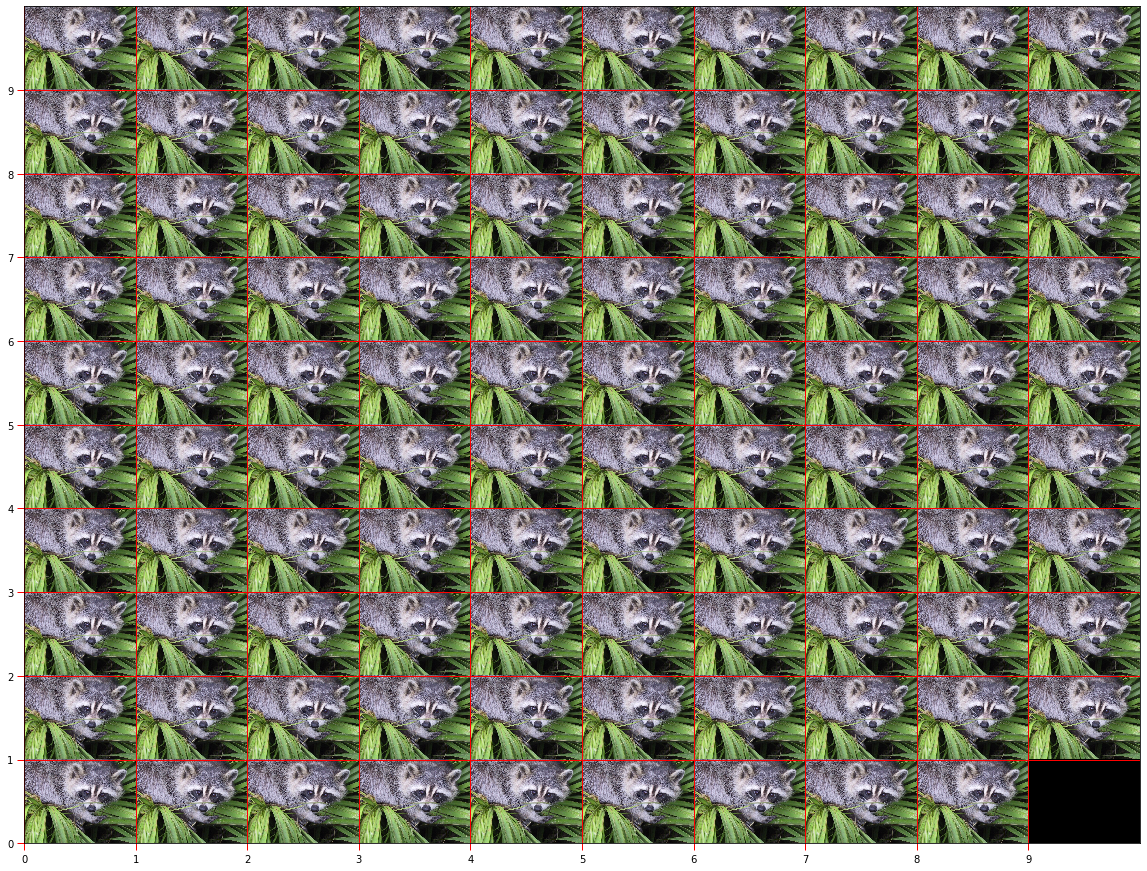

In [15]:
%%time
from scipy import misc
img = misc.face()
img_array = np.array([np.asarray(img)]*99)
fig = plt.figure(figsize=(20,20))
NavGridView(img_array, ax=plt.gca()).render().ticks(minor=False).grid()
plt.title("")

CPU times: user 123 ms, sys: 4.95 ms, total: 128 ms
Wall time: 129 ms


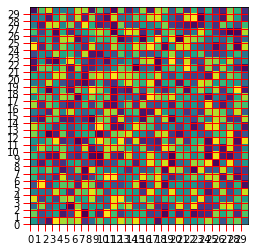

In [16]:
%%time
NavGridView(np.random.rand(30,30,1,1,1)).render().ticks(minor=False).grid()

## discrete $\phi$

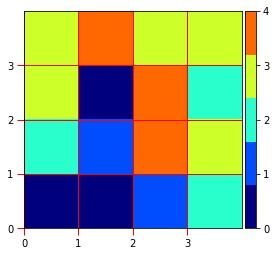

In [17]:
discrete_data = np.random.randint(0, 5, (4,4,1)).astype(np.uint8)
space = sorted(np.unique(discrete_data))
cmap = get_discrete_cmap(cm.jet, space)
p = NavGridView(discrete_data).render(cmap=cmap).ticks().grid().colorbar(
    ticks = space
)

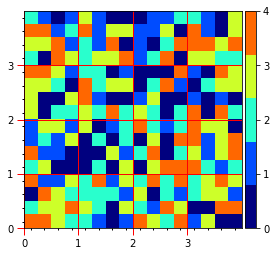

In [18]:
discrete_data = np.random.randint(0, 5, (4,4,4,4,1)).astype(np.uint8)
space = sorted(np.unique(discrete_data))
cmap = get_discrete_cmap(cm.jet, space)
p = NavGridView(discrete_data).render(cmap=cmap).ticks().grid().colorbar(
    ticks = space
)